# BLT Bathy basic map

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from pathlib import Path

%reload_ext autoreload
%autoreload 2

plt.ion()

%config InlineBackend.figure_format = 'retina'

In [2]:
def cartopy_axes(ax, maxticks="auto"):
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.5,
        color="gray",
        alpha=0.5,
        linestyle="-",
    )
    gl.top_labels = False
    gl.right_labels = False
    if maxticks == "auto":
        gl.xlocator = mticker.AutoLocator()
        gl.ylocator = mticker.AutoLocator()
    else:
        gl.xlocator = mticker.MaxNLocator(maxticks)
        gl.ylocator = mticker.MaxNLocator(maxticks)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


In [3]:
def map_setup(size=10):
    projection = ccrs.Orthographic(
        central_longitude=-12, central_latitude=54.3, globe=None
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(size, size),
        subplot_kw={"projection": projection},
    )

    ax.spines["geo"].set_visible(False)
    cartopy_axes(ax)
    return fig, ax

# make the map transform quicker to apply
tm = dict(transform=ccrs.PlateCarree())

In [4]:
def plot_map():
        # Load newly processed multibeam data
    # config.yml has the path to the qc-ed data file
    canyon = -1 * xr.open_dataarray('/Volumes/Public/DY132/Bathymetry/blt_canyon_mb_qc.nc')
    cany = canyon.where(
        (canyon.lat < 54.36)
        & (canyon.lat > 54.16)
        & (canyon.lon > -12.1)
        & (canyon.lon < -11.8),
        drop=True,
    )

    tm = dict(transform=ccrs.PlateCarree())

    fig, ax = map_setup(size=15)
    h1 = cany.plot.contour(
        ax=ax,
        transform=ccrs.PlateCarree(),
        levels=np.arange(-3200, -1000, 10),
        colors="k",
        linestyles="-",
        linewidths=0.3,
    )
    h2 = cany.plot.contour(
        ax=ax,
        transform=ccrs.PlateCarree(),
        levels=np.arange(-3200, -1000, 100),
        colors="k",
        linestyles="-",
    )
    ax.clabel(h2, fontsize=8, fmt="%d", zorder=29)


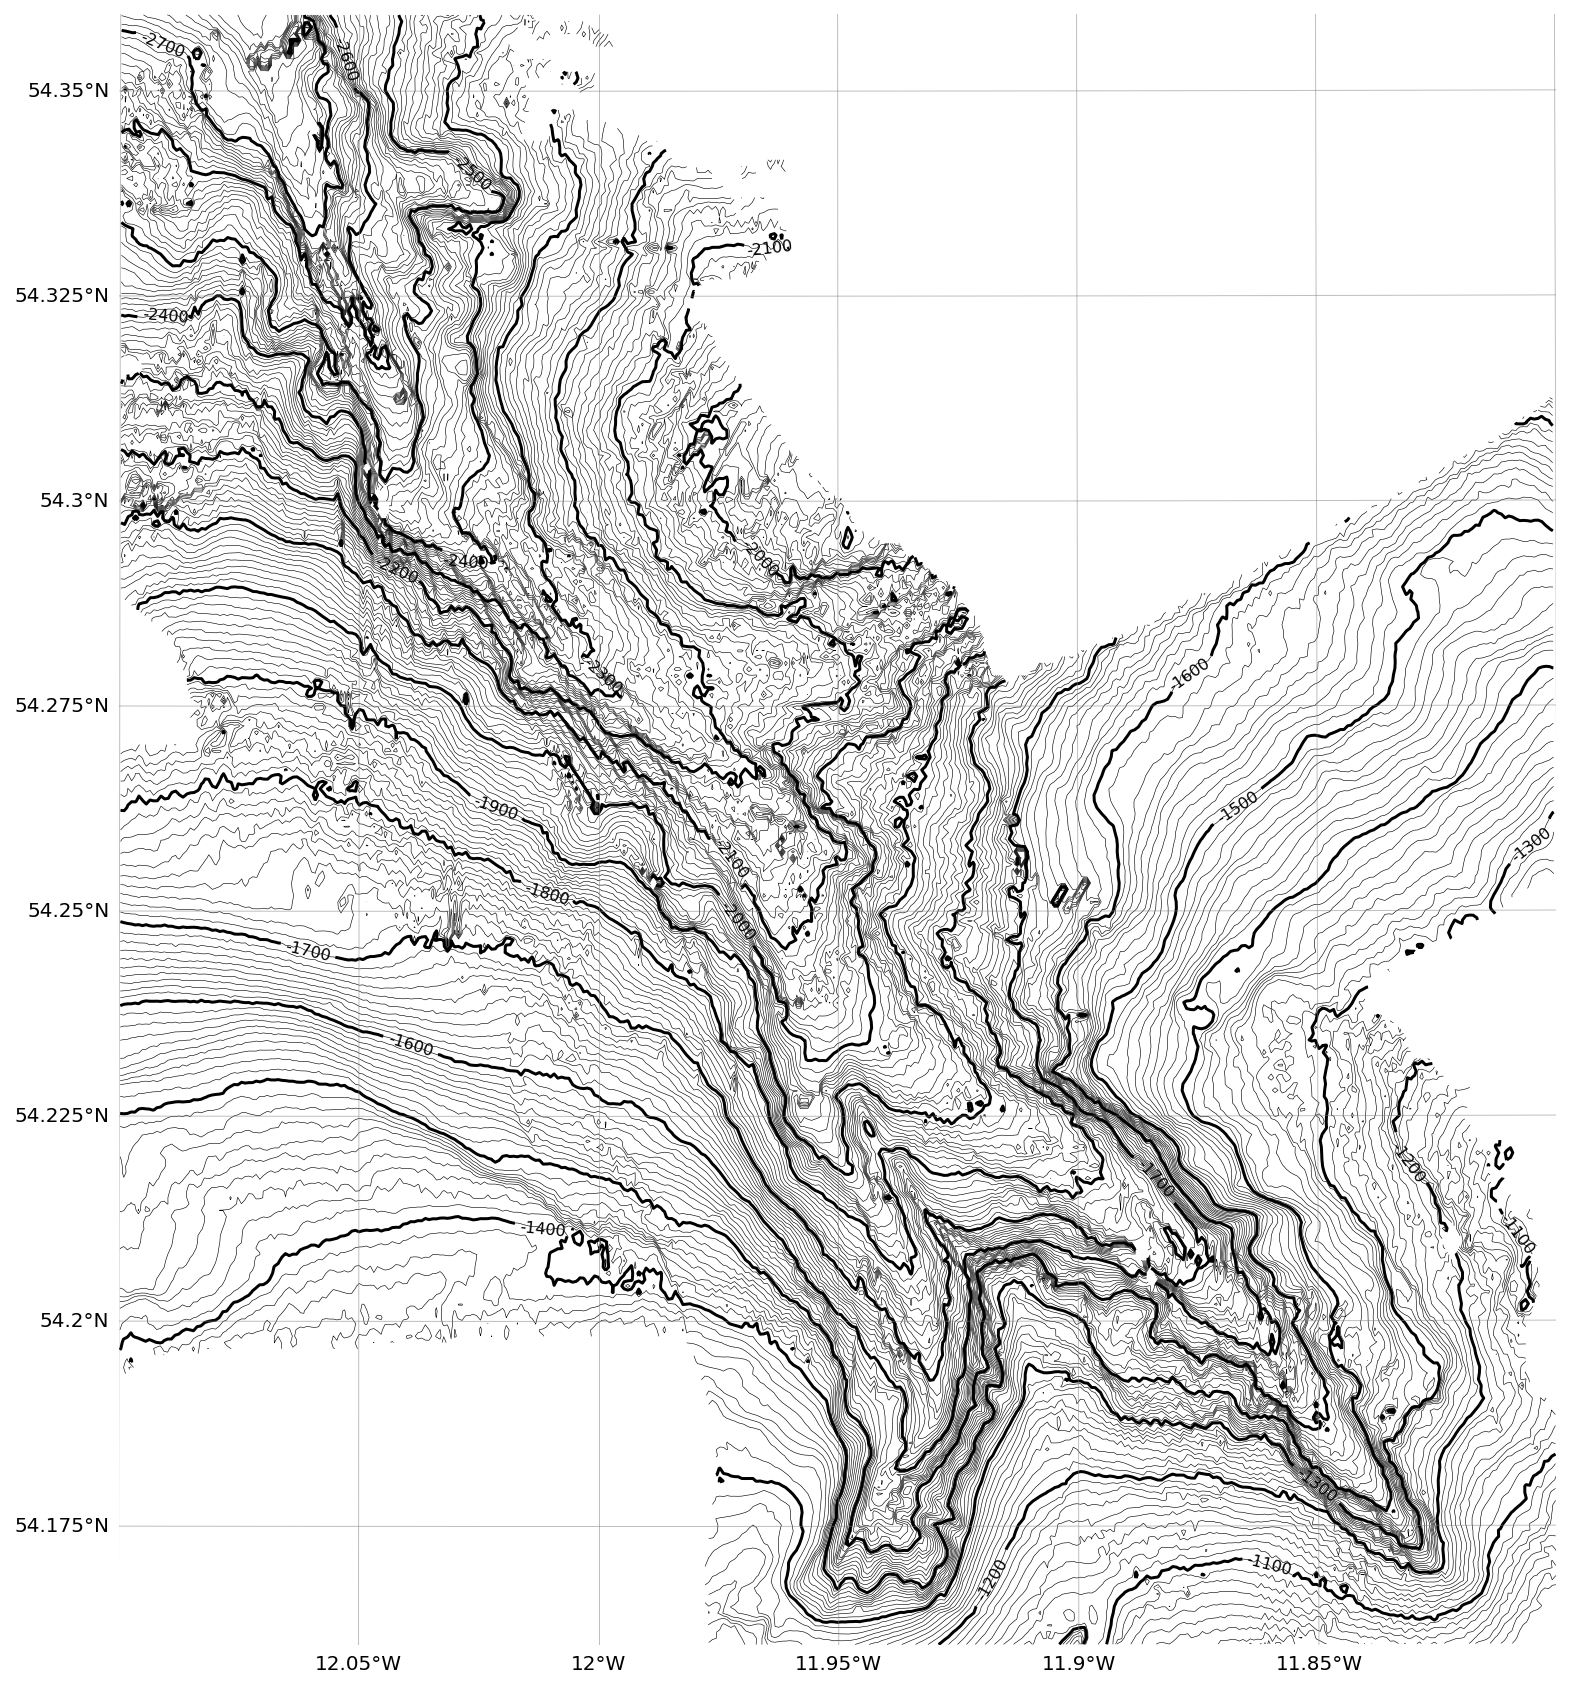

In [5]:
plot_map()